In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv('data/col_data.csv', encoding="latin-1")

C:\Users\celin\AppData\Local\Temp\ipykernel_16328\546326324.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---
### DBSCAN

In [2]:
# year, track_name, track_popularity, album, artist_name, artist_genres, artist_popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature 

def scatterplot(colx, coly):
    df = pd.DataFrame(data[[colx, coly]])
    plt.scatter(df[colx], df[coly])
    plt.show()
    # sb.jointplot(data=df, x=colx, y=coly, height=7)
    return df

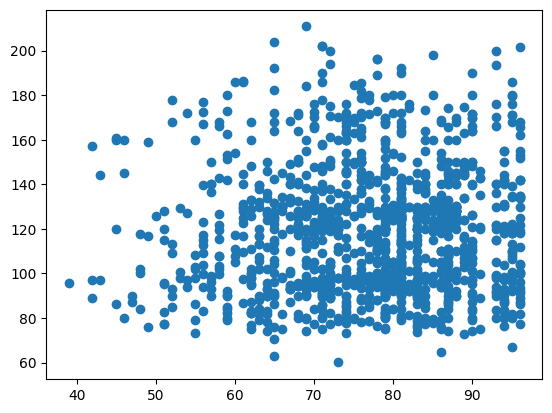

In [3]:
# keep: track_popularity / artist_popularity, artist_popularity / tempo, danceability / energy, danceability - valence, energy / acousticness, energy / liveness, energy / valence, 
# ?: 'track_popularity - tempo', alot of noise in dbscan

#  'speechiness - acousticness', 'speechiness - instrumentalness', 'speechiness - liveness', 'speechiness - valence', 'speechiness - tempo', 'acousticness - liveness', 'acousticness - valence', 'acousticness - tempo', 'liveness - valence', 'liveness - tempo', 'valence - tempo'
epsi = 2.3
minsam = 4
k = 15
colx = "artist_popularity"
coly = "tempo"
df = scatterplot(colx, coly)

In [4]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=epsi, min_samples=minsam).fit(df)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(df, labels):.3f}")

Estimated number of clusters: 30
Estimated number of noise points: 203
Silhouette Coefficient: -0.443


---
### K-Means

In [5]:
from sklearn.cluster import KMeans

kmeanspp = KMeans(n_clusters=k).fit(df)
kmeanspp.labels_

array([7, 9, 6, ..., 5, 7, 3])

In [6]:
kmeans = KMeans(n_clusters=k, init="random").fit(df)
kmeans.labels_

array([13,  5,  4, ..., 12,  8,  1])

---
### Graphs

<Axes: xlabel='artist_popularity', ylabel='tempo'>

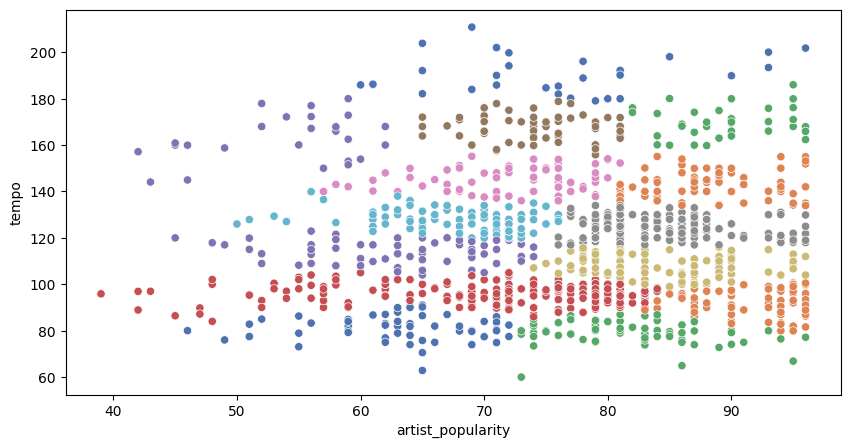

In [12]:
# Kmeans
fig, ax = plt.subplots(figsize=(10, 5))
sb.scatterplot(data=df, x=colx, y=coly, hue=kmeans.labels_, ax=ax, legend=False, palette="deep")

<Axes: xlabel='artist_popularity', ylabel='tempo'>

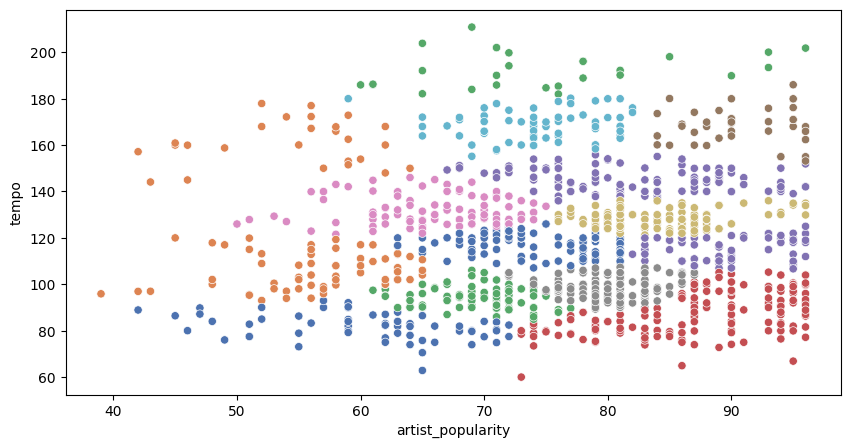

In [13]:
# Kmeans++
fig, ax = plt.subplots(figsize=(10, 5))
sb.scatterplot(data=df, x=colx, y=coly, hue=kmeanspp.labels_, ax=ax, legend=False, palette="deep")

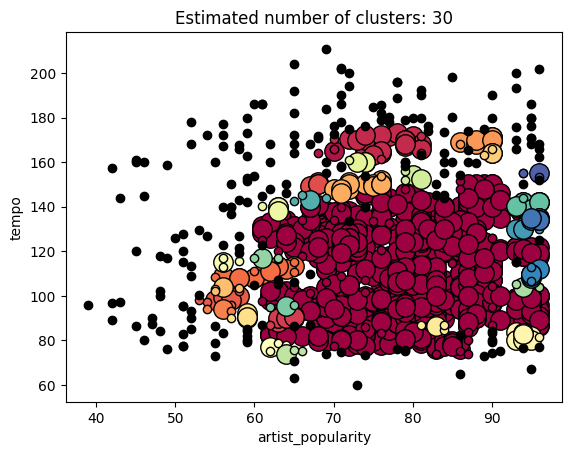

<Figure size 500x1000 with 0 Axes>

In [9]:
# DBScan
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # continue
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy[colx],
        xy[coly],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[colx],
        xy[coly],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel(colx)
plt.ylabel(coly)
plt.figure(figsize=(5,10))
plt.show()